In [1]:
# Внимание! 
# Запрещается вносить изменения в наименования в переменных, путей к файлам и их имена
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold 
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,auc
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support,recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import balanced_accuracy_score,average_precision_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

### Область работы 2 (поиск лучшей модели)

In [23]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# Путь к файлу(ам) (запрещено изменять)
# В данной области запрещается использовать другие файлы с данными
path_train = 'train.csv'

In [24]:
df = pd.read_csv(path_train)
display(df.isna().sum())
df.info()
df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    int64  
 1   sex       227 non-null    int64  
 2   cp        227 non-null    int64  
 3   trestbps  227 non-null    int64  
 4   chol      227 non-null    int64  
 5   fbs       227 non-null    int64  
 6   restecg   227 non-null    int64  
 7   thalach   227 non-null    int64  
 8   exang     227 non-null    int64  
 9   oldpeak   227 non-null    float64
 10  slope     227 non-null    int64  
 11  ca        227 non-null    int64  
 12  thal      227 non-null    int64  
 13  target    227 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 25.0 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
1,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
4,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
223,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
224,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
225,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


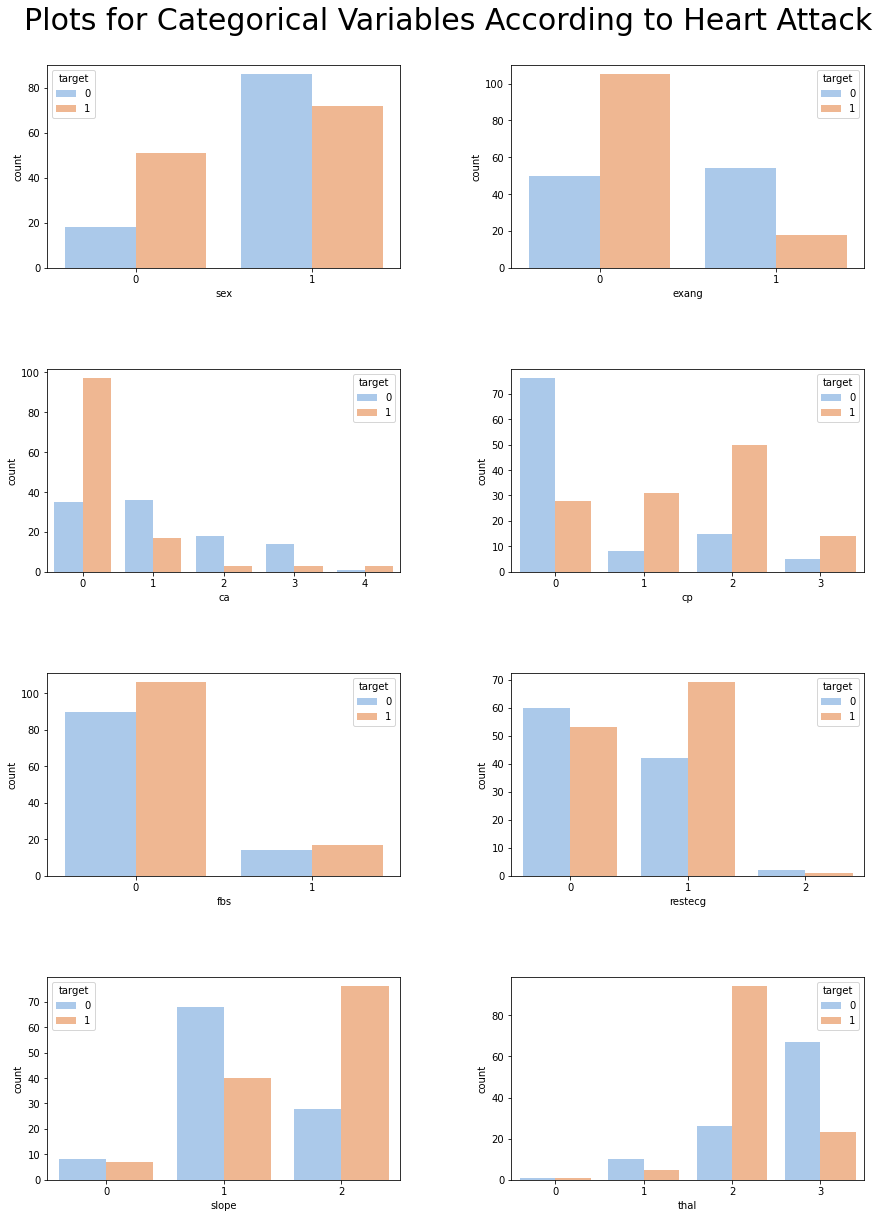

In [6]:
cat_data = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_data = ["age","trestbps","chol","thalach","oldpeak"]
target_data = ["target"]

f,axes=plt.subplots(nrows=4, ncols=2, figsize=(14,18))
f.tight_layout(pad=8) 
f.suptitle('Plots for Categorical Variables According to Heart Attack', fontsize=30)

cols=df[cat_data].columns 

x_axes=0
y_axes=0

for col in cols:
  sns.countplot(data=df, x=col, hue = "target", ax=axes[x_axes,y_axes], palette='pastel')

  if y_axes == 1:  
    y_axes=0
    x_axes+=1
  else:
    y_axes+=1


plt.show()

In [31]:

#Выделяем X y

X = df.drop('target',axis=1)
y = df['target']


#сплитуем данные


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#перемасштабируем



imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test= imputer.transform(X_test)

In [8]:
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()
MPL = MLPClassifier()
sdg = SGDClassifier()
bgc = BaggingClassifier()
adc = AdaBoostClassifier()
gnb = GaussianNB()


for i in [gbc, dtc, rf, knn, svc, MPL, sdg, bgc, adc, gnb]:
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    test_score = recall_score(y_test, pred)
    train_score = recall_score(y_train, i.predict(X_train))
    if abs(train_score - test_score) <= 0.08:
        print(i)
        print("score for train df", recall_score(y_train, i.predict(X_train)))
        print("score for test df", recall_score(y_test, pred))
        print(classification_report(y_test, pred))
        print(confusion_matrix(y_test, pred))

GradientBoostingClassifier()
score for train df 1.0
score for test df 0.95
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.79      0.95      0.86        20

    accuracy                           0.87        46
   macro avg       0.87      0.88      0.87        46
weighted avg       0.88      0.87      0.87        46

[[21  5]
 [ 1 19]]
RandomForestClassifier()
score for train df 1.0
score for test df 0.95
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.76      0.95      0.84        20

    accuracy                           0.85        46
   macro avg       0.86      0.86      0.85        46
weighted avg       0.87      0.85      0.85        46

[[20  6]
 [ 1 19]]
SVC()
score for train df 0.9514563106796117
score for test df 1.0
              precision    recall  f1-score   support

           0       1.00      0.27      0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
0
------------------------------------
Словарь с параметрами для лучшего решения:
{'estimator__var_smoothing': 1e-11}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.802288

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-11))])

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-11))])
score for train df 0.883495145631068
score for test df 0.95
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.76      0.95      0.84        20

    accuracy                           0.85        46
   macro avg       0.86      0.86      0.85        46
weighted avg       0.87      0.85      0.85        46

[[20  6]
 [ 1 19]]
0.859615384

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


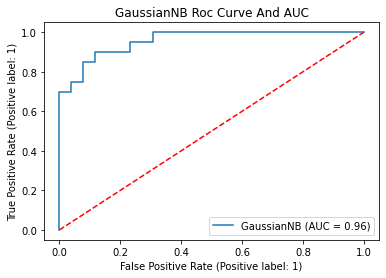

In [9]:
#GaussianNB()


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline(steps=[
                    ('pca', PCA()),
                    ('estimator', GaussianNB()),
                    ])
    
parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9]}

grid = GridSearchCV(pipe, parameters, cv= kfold, scoring='recall', n_jobs=-1)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))


pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_gbc = recall_score(y_test, pred)
train_score_gbc = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(balanced_accuracy_score(y_test, pred))
print(average_precision_score(y_test, pred))
plot_roc_curve(pipeline, X_test, y_test, name = "GaussianNB")
plt.title("GaussianNB Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()




----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
1
------------------------------------
Словарь с параметрами для лучшего решения:
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.903890

------------------------------------
Настройки лучшей модели в контейнере:
RandomForestClassifier(max_depth=5, n_estimators=30)

RandomForestClassifier(max_depth=5, n_estimators=30)
score for train df 0.9902912621359223
score for test df 0.95
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.76      0.95      0.84        20

    accuracy                           0.85        46
   macro avg       0.86      0.86      0.85        46
weighted avg       0.87      0.85      0.85        46

[[20  6]
 [ 1 19]]
0.8596153846153847
0.7437391304347826


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


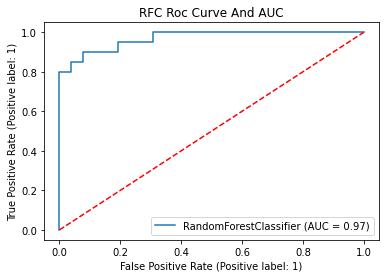

In [10]:
# RandomForestClassifier


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
parameters = {'n_estimators':[10,30,50],
              'criterion':["gini", "entropy"],
              'max_depth': [5,10]}
grid = GridSearchCV(rf, parameters, cv= kfold, scoring='recall', n_jobs=-1)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))


pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_RFC = recall_score(y_test, pred)
train_score_RFC = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(balanced_accuracy_score(y_test, pred))
print(average_precision_score(y_test, pred))
plot_roc_curve(pipeline, X_test, y_test, name = "RandomForestClassifier")
plt.title("RFC Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()




----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
17
------------------------------------
Словарь с параметрами для лучшего решения:
{'alpha': 1e-05, 'l1_ratio': 1, 'loss': 'log', 'penalty': 'elasticnet'}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.902059

------------------------------------
Настройки лучшей модели в контейнере:
SGDClassifier(alpha=1e-05, class_weight='balanced', l1_ratio=1, loss='log',
              penalty='elasticnet', random_state=0)

SGDClassifier(alpha=1e-05, class_weight='balanced', l1_ratio=1, loss='log',
              penalty='elasticnet', random_state=0)
score for train df 1.0
score for test df 1.0
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        26
           1       0.45      1.00      0.62        20

    accuracy                           0.48        46
   macro avg       0.73

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


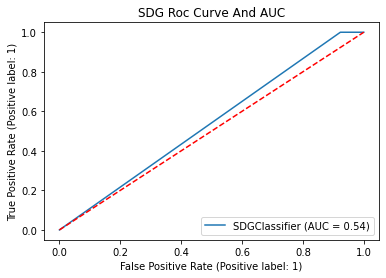

In [11]:
#SDGClassifier


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
param_grid = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}
clf = SGDClassifier(random_state=0, class_weight='balanced')

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= kfold,
                                    n_jobs=-1, scoring='recall')

grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))


pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_SDG = recall_score(y_test, pred)
train_score_SDG = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(average_precision_score(y_test, pred))
print(balanced_accuracy_score(y_test, pred))

plot_roc_curve(pipeline, X_test, y_test, name = "SDGClassifier")
plt.title("SDG Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

Fitting 10 folds for each of 84 candidates, totalling 840 fits
----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
1
------------------------------------
Словарь с параметрами для лучшего решения:
{'C': 1, 'cache_size': 200, 'decision_function_shape': 'ovo', 'gamma': 'auto'}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 1.000000

------------------------------------
Настройки лучшей модели в контейнере:
SVC(C=1, decision_function_shape='ovo', gamma='auto', random_state=42)

SVC(C=1, decision_function_shape='ovo', gamma='auto', random_state=42)
score for train df 1.0
score for test df 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.43      1.00      0.61        20

    accuracy                           0.43        46
   macro avg       0.22      0.50      0.30        46
weighted avg  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/util

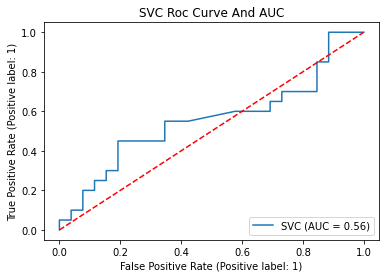

In [12]:
#SVC
random_state = 42
classifier = SVC(random_state = random_state)

svc_param_grid = {"cache_size":[200, 300, 500],
                  "decision_function_shape":["ovo","ovr"],
                  "gamma": ["scale","auto"],
                  "C": [1,10,50,100,200,300,1000]}
classifier_param = svc_param_grid

grid = GridSearchCV(classifier, param_grid=classifier_param, cv = StratifiedKFold(n_splits = 10), scoring = "recall", n_jobs = -1,verbose = 1)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_SVC = recall_score(y_test, pred)
train_score_SVC = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(average_precision_score(y_test, pred))
print(balanced_accuracy_score(y_test, pred))

plot_roc_curve(pipeline, X_test, y_test, name = "SVC")
plt.title("SVC Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
25
------------------------------------
Словарь с параметрами для лучшего решения:
{'classifier': KNeighborsClassifier(n_neighbors=18, p=1), 'classifier__n_neighbors': 18, 'classifier__p': 1, 'classifier__weights': 'uniform', 'preprocessing': RobustScaler()}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.923960

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=18, p=1))])

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=18, p=1))])
score for train df 0.912621359223301
score for test df 0.95
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1   

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


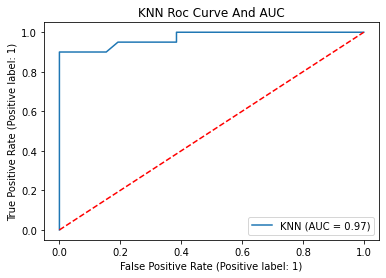

In [13]:
#KNeighborsClassifier

kfold = KFold(n_splits=7, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[7, 12, 18]
p=[1,2]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, scoring = "recall", cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))


pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_knn = recall_score(y_test, pred)
train_score_knn = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(average_precision_score(y_test, pred))
print(balanced_accuracy_score(y_test, pred))

plot_roc_curve(pipeline, X_test, y_test, name = "KNN")
plt.title("KNN Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
2
------------------------------------
Словарь с параметрами для лучшего решения:
{'n_estimators': 30}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.845714

------------------------------------
Настройки лучшей модели в контейнере:
AdaBoostClassifier(n_estimators=30)

AdaBoostClassifier(n_estimators=30)
score for train df 0.941747572815534
score for test df 0.85
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.71      0.85      0.77        20

    accuracy                           0.78        46
   macro avg       0.79      0.79      0.78        46
weighted avg       0.80      0.78      0.78        46

[[19  7]
 [ 3 17]]
0.6673007246376812
0.7903846153846154


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


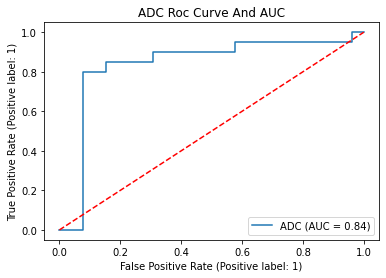

In [14]:
#AdaBoostClassifier

param_grid = {
              "n_estimators": [1, 2,30,50]
             }



adc = AdaBoostClassifier()


grid = GridSearchCV(adc, param_grid=param_grid, scoring = "recall", )
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

pipeline = grid.best_estimator_
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score_adc = recall_score(y_test, pred)
train_score_adc = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(average_precision_score(y_test, pred))
print(balanced_accuracy_score(y_test, pred))

plot_roc_curve(pipeline, X_test, y_test, name = "ADC")
plt.title("ADC Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [15]:
print("Метрика recall for train df для AdaBoostingClassifier", train_score_adc )
print("Метрика recall for test df для AdaBoostingClassifier", test_score_adc )
print("------------------------------------------------")

print("Метрика recall for train df для KNeighborsClassifier", train_score_knn )
print("Метрика recall for test df для KNeighborsClassifier", test_score_knn )
print("------------------------------------------------")


print("Метрика recall for train df для SVC", train_score_SVC )
print("Метрика recall for test df для SVC", test_score_SVC )
print("------------------------------------------------")


print("Метрика recall for train df для SDGClassifier", train_score_SDG )
print("Метрика recall for test df для SDGClassifier", test_score_SDG )
print("------------------------------------------------")


print("Метрика recall for train df для RandomForestClassifier", train_score_RFC )
print("Метрика recall for test df для RandomForestClassifier", test_score_RFC )

print("------------------------------------------------")


print("Метрика recall for train df для GaussianNB", train_score_gbc )
print("Метрика recall for test df для GaussianNB", test_score_gbc )


Метрика recall for train df для AdaBoostingClassifier 0.941747572815534
Метрика recall for test df для AdaBoostingClassifier 0.85
------------------------------------------------
Метрика recall for train df для KNeighborsClassifier 0.912621359223301
Метрика recall for test df для KNeighborsClassifier 0.95
------------------------------------------------
Метрика recall for train df для SVC 1.0
Метрика recall for test df для SVC 1.0
------------------------------------------------
Метрика recall for train df для SDGClassifier 1.0
Метрика recall for test df для SDGClassifier 1.0
------------------------------------------------
Метрика recall for train df для RandomForestClassifier 0.9902912621359223
Метрика recall for test df для RandomForestClassifier 0.95
------------------------------------------------
Метрика recall for train df для GaussianNB 0.883495145631068
Метрика recall for test df для GaussianNB 0.95


### Область работы 3 (выполнение лучшей модели)

In [16]:
# Данный блок(и) в области 3 выполняется преподавателем
# 
# Запрещается вносить изменения в наименования в переменных и путей к файлам определенные преподавателем
# 
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [32]:
# Путь(название) к файлу(ам) (запрещено изменять)
path_train = 'train.csv'
path_test  = 'test.csv'

# чтение файлов (разрещается использовать только указанные ранее пути)
df = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)



In [33]:
#Выделяем X y

X = df.drop('target',axis=1)
y = df['target']


#сплитуем данные


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#перемасштабируем

imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test= imputer.transform(X_test)
X_df_test = imputer.transform(df_test)


In [34]:
# Блок(и) обучения и поверки модели

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=18, p=1,
                                      weights='distance'))])
score for train df 1.0
score for test df 0.9259259259259259
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.86      0.93      0.89        27

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46

[[15  4]
 [ 2 25]]
0.8576998050682261
0.841690265978122


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


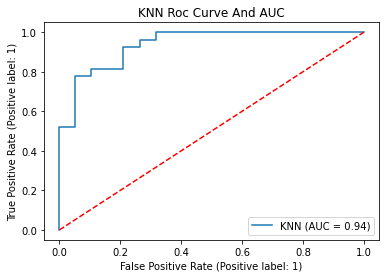

In [35]:
pipeline = make_pipeline(RobustScaler(),
                         KNeighborsClassifier(n_neighbors=18, p=1,
                                      weights='distance'))
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
test_score = recall_score(y_test, pred)
train_score = recall_score(y_train, pipeline.predict(X_train))

print(pipeline)
print("score for train df", recall_score(y_train, pipeline.predict(X_train)))
print("score for test df", recall_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

print(balanced_accuracy_score(y_test, pred))
print(average_precision_score(y_test, pred))


plot_roc_curve(pipeline, X_test, y_test, name = "KNN")
plt.title("KNN Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()




In [36]:
# Блок предсказания с использованием test.csv
#  
# название вектора предсказанных значений  y_predict 
# название cписка индексов использованных в предсказании   mask_true 

In [37]:
mask_true = df_test.index.tolist()
y_predict = pipeline.predict(X_df_test)